### Get a dataset

This is a limited dataset from the kaggle Food 101 dataset (https://www.kaggle.com/datasets/dansbecker/food-101) that only has pizza and steak

In [1]:
# Download a data set
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-02 17:18:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:807::2010, 2800:3f0:4004:808::2010, 2800:3f0:4004:809::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:807::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104,47M  23,0MB/s    in 5,3s    

2023-07-02 17:18:58 (19,6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


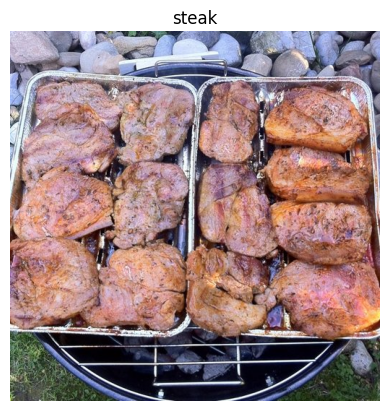

In [15]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [16]:
# View the img (actually just a big array/tensor)
img

array([[[196, 197, 228],
        [190, 191, 222],
        [212, 213, 244],
        ...,
        [149, 153, 180],
        [153, 158, 188],
        [153, 158, 188]],

       [[198, 199, 230],
        [223, 224, 255],
        [205, 206, 237],
        ...,
        [168, 172, 201],
        [170, 175, 205],
        [159, 164, 196]],

       [[193, 194, 224],
        [215, 216, 246],
        [218, 219, 249],
        ...,
        [159, 162, 195],
        [153, 156, 191],
        [154, 157, 192]],

       ...,

       [[214, 235, 156],
        [145, 165,  93],
        [100, 118,  58],
        ...,
        [ 81, 102,  71],
        [ 64,  84,  56],
        [ 78,  98,  70]],

       [[194, 212, 136],
        [100, 117,  47],
        [ 82,  97,  40],
        ...,
        [ 72,  91,  61],
        [ 45,  64,  34],
        [ 54,  73,  43]],

       [[207, 225, 149],
        [ 89, 106,  36],
        [ 80,  93,  39],
        ...,
        [ 78,  97,  67],
        [ 63,  82,  52],
        [ 56,  75,  45]]

In [17]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [18]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.76862745, 0.77254902, 0.89411765],
        [0.74509804, 0.74901961, 0.87058824],
        [0.83137255, 0.83529412, 0.95686275],
        ...,
        [0.58431373, 0.6       , 0.70588235],
        [0.6       , 0.61960784, 0.7372549 ],
        [0.6       , 0.61960784, 0.7372549 ]],

       [[0.77647059, 0.78039216, 0.90196078],
        [0.8745098 , 0.87843137, 1.        ],
        [0.80392157, 0.80784314, 0.92941176],
        ...,
        [0.65882353, 0.6745098 , 0.78823529],
        [0.66666667, 0.68627451, 0.80392157],
        [0.62352941, 0.64313725, 0.76862745]],

       [[0.75686275, 0.76078431, 0.87843137],
        [0.84313725, 0.84705882, 0.96470588],
        [0.85490196, 0.85882353, 0.97647059],
        ...,
        [0.62352941, 0.63529412, 0.76470588],
        [0.6       , 0.61176471, 0.74901961],
        [0.60392157, 0.61568627, 0.75294118]],

       ...,

       [[0.83921569, 0.92156863, 0.61176471],
        [0.56862745, 0.64705882, 0.36470588],
        [0.39215686, 0

### Building a first model
1. Load images
2. Pre-process images (normalization)
3. Build a CNN to find patterns in the images
4. Compile the CNN
5. Fit the CNN to train the data

In [20]:
import tensorflow as tf

# Setup gpu drivers
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [21]:
# Create a first model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32, # number of images to process at a time 
    target_size=(224, 224), # convert all images to be 224 x 224
    class_mode="binary", # type of problem we're working on
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-07-02 17:50:09.225045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6316 - accuracy: 0.6300

2023-07-02 17:50:25.268890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 17s 352ms/step - loss: 0.6316 - accuracy: 0.6300 - val_loss: 0.5620 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 16s 330ms/step - loss: 0.4577 - accuracy: 0.7987 - val_loss: 0.3855 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 16s 340ms/step - loss: 0.3911 - accuracy: 0.8287 - val_loss: 0.3769 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 16s 340ms/step - loss: 0.3474 - accuracy: 0.8513 - val_loss: 0.3612 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 16s 338ms/step - loss: 0.3084 - accuracy: 0.8667 - val_loss: 0.3303 - val_accuracy: 0.8460


In [22]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### Using the model from the classification notebook

In [23]:
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_2 = model_2.fit(
    train_data, # use same training data created above
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data, # use same validation data created above
    validation_steps=len(valid_data)
)

Epoch 1/5


2023-07-02 18:03:50.674120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 1.2554 - accuracy: 0.4960

2023-07-02 18:03:53.090383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 3s 60ms/step - loss: 1.2554 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 55ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 61ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 58ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 57ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000


In [24]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [25]:
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5


2023-07-02 18:05:13.739745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 3.1798 - accuracy: 0.6313

2023-07-02 18:05:19.229810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 6s 122ms/step - loss: 3.1798 - accuracy: 0.6313 - val_loss: 0.6085 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 1.0574 - accuracy: 0.6767 - val_loss: 0.5925 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6779 - accuracy: 0.7447 - val_loss: 0.6078 - val_accuracy: 0.7440
Epoch 4/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6386 - accuracy: 0.7367 - val_loss: 0.7340 - val_accuracy: 0.7300
Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.5632 - accuracy: 0.7647 - val_loss: 0.4537 - val_accuracy: 0.8000


In [26]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________
